# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None


# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("southCallCenter.csv")

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [2]:
#Code Used:
north_reps_count=len(north_df['Rep ID'].unique())
print("Number of reps in the North branch:",north_reps_count)

Number of reps in the North branch: 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [3]:
#Code Used:
south_reps_count=len(south_df['Rep ID'].unique())
print("Number of reps in the south branch:",south_reps_count)

Number of reps in the south branch: 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [4]:
#Code Used:
print("The average bust minutes for the North Branch:",north_df['Busy Minutes'].mean().round(2))
print("The average not ready minutes:",north_df['Not Ready Minutes'].mean().round(2))
print("The average incoming wait time:",north_df['Incoming Wait Time'].mean().round(2))
print("The average during call wait time :",north_df['During Call Wait Time'].mean().round(2))

The average bust minutes for the North Branch: 9.99
The average not ready minutes: 1.91
The average incoming wait time: 3.05
The average during call wait time : 2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [5]:
#Code Used:
print("The average busy minutes for the south branch:",south_df['Busy Minutes'].mean().round(2))
print("The average not ready minutes:",south_df['Not Ready Minutes'].mean().round(2))
print("The average incoming wait time:",south_df['Incoming Wait Time'].mean().round(2))
print("The average during call wait time:",south_df['During Call Wait Time'].mean().round(2))


The average busy minutes for the south branch: 10.05
The average not ready minutes: 1.91
The average incoming wait time: 3.0
The average during call wait time: 3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [6]:
# Code Used:
ngb_TimeBlock=north_df.groupby('Time Block')
north_Calls_pertimeblock=ngb_TimeBlock.agg({'Calls':["sum"]})
sgb_TimeBlock=south_df.groupby("Time Block")
south_Calls_pertimeblock=sgb_TimeBlock.agg({'Calls':["sum"]})
print(north_Calls_pertimeblock)
print(south_Calls_pertimeblock)
print(north_Calls_pertimeblock+south_Calls_pertimeblock)

           Calls
             sum
Time Block      
10:00 AM      43
11:00 AM      25
12:00 PM      45
1:00 PM       17
2:00 PM       35
3:00 PM       30
4:00 PM       28
5:00 PM       17
9:00 AM        5
           Calls
             sum
Time Block      
10:00 AM      56
11:00 AM      31
12:00 PM      75
1:00 PM       23
2:00 PM       30
3:00 PM       43
4:00 PM       25
5:00 PM       26
9:00 AM        5
           Calls
             sum
Time Block      
10:00 AM      99
11:00 AM      56
12:00 PM     120
1:00 PM       40
2:00 PM       65
3:00 PM       73
4:00 PM       53
5:00 PM       43
9:00 AM       10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 
- 1b) Reps in the South Branch = 


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 
> - Not Ready Minutes = 
> - Incoming Wait Time = 
> - During Call Wait Time = 
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 
> - Not Ready Minutes = 
> - Incoming Wait Time = 
> - During Call Wait Time = 
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 
> - 10:00AM  = 
> - 11:00AM  = 
> - 12:00PM  = 
> - 1:00PM   = 
> - 2:00PM   = 
> - 3:00PM   = 
> - 4:00PM   = 
> - 5:00PM   = 



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 


> Your Answer:YES, there is missing data in 'Incoming Wait Time' columns in both data sheets. Filled the missing values with the 0 as outgoing calls cannot have incoming wait time.

(245, 15)


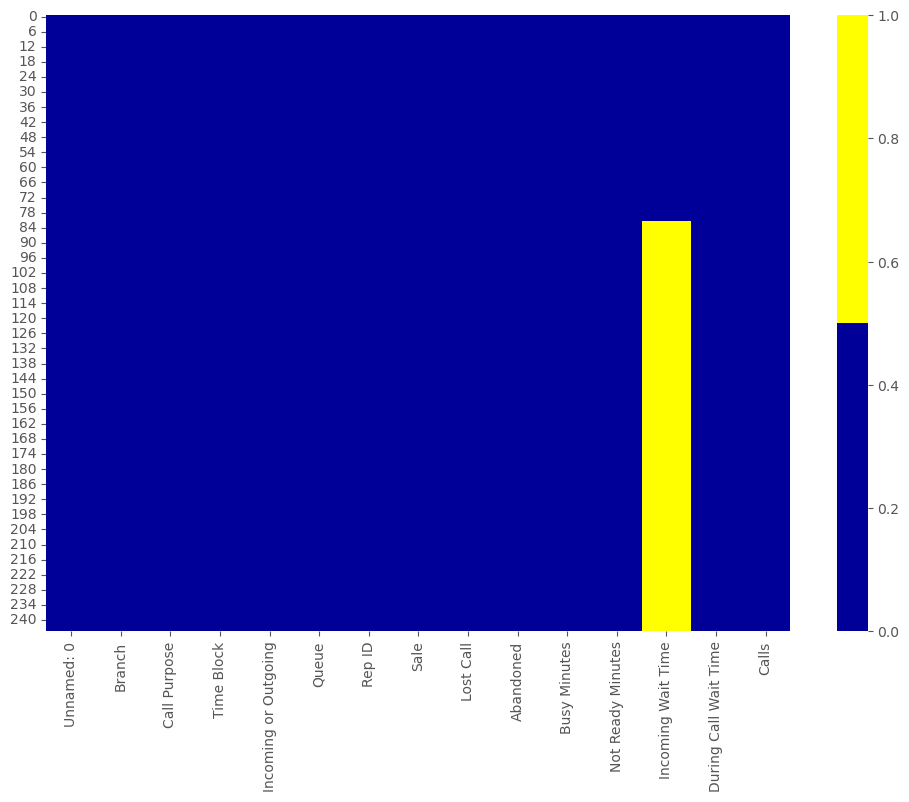

In [7]:
# Code Used
# Add Additional Cells as needed.
# Plot a heatmap of any missing data
cols = north_df.columns[:30]# first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(north_df[cols].isnull(), cmap=sns.color_palette(colours))
print(north_df.shape)


(314, 15)


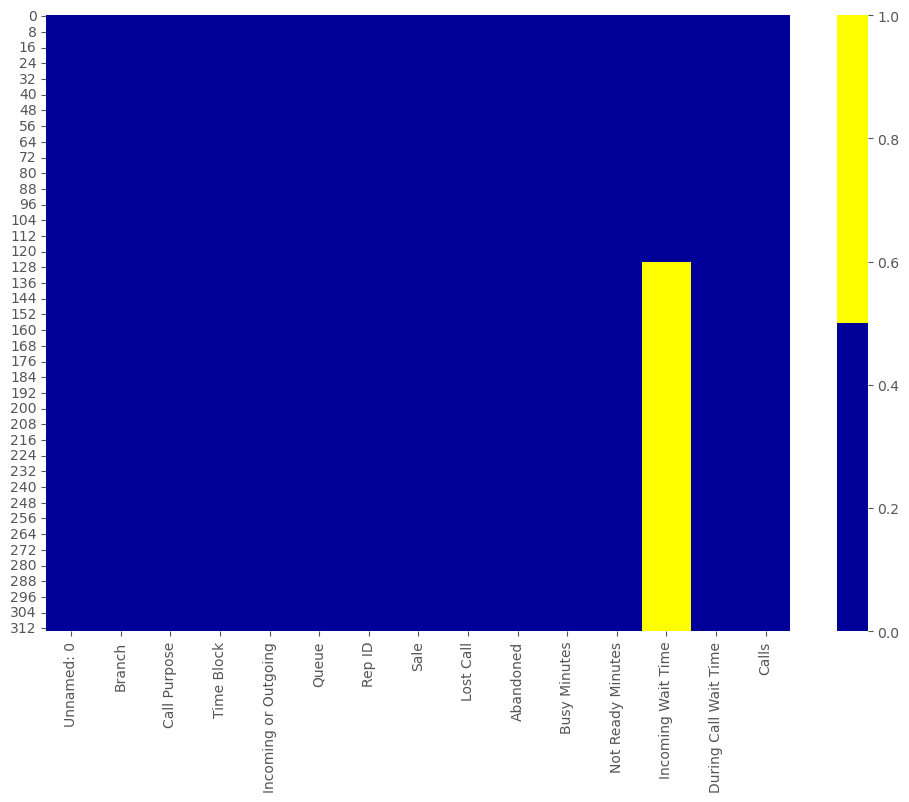

In [8]:
# Plot a heatmap of any missing data
cols = south_df.columns[:30] # first 30 columns
colours = ['#000099', '#FFFF00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(south_df[cols].isnull(), cmap=sns.color_palette(colours))
print(south_df.shape)

In [9]:
#to handle missing data in incoming wait time column I am imputing 0 in place of missing values
# because it is for outgoing calls and no incoming wait time for outgoing calls

north_df["Incoming Wait Time"]=north_df["Incoming Wait Time"].fillna(0)
south_df["Incoming Wait Time"]=south_df["Incoming Wait Time"].fillna(0)

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: 

In [10]:
#Code Used
# Add Additional Cells as needed.
north_df['Sale'].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [11]:
#format
north_df=north_df.replace({'Sale':{'NO':False,'YES':True}})
south_df=south_df.replace({'Sale':{'NO':False,'YES':True}})

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: 

In [12]:
#Code Used
# Add Additional Cells as needed.
north_duplicate=north_df[north_df.duplicated()]
# there were no duplicate rows
print(north_df.shape)

print(north_duplicate)

(245, 15)
Empty DataFrame
Columns: [Unnamed: 0, Branch, Call Purpose, Time Block, Incoming or Outgoing, Queue, Rep ID, Sale, Lost Call, Abandoned, Busy Minutes, Not Ready Minutes, Incoming Wait Time, During Call Wait Time, Calls]
Index: []


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: 

In [13]:
#Code Used
# Add Additional Cells as needed
north_df = north_df.drop('Unnamed: 0', axis=1)
south_df = south_df.drop('Unnamed: 0', axis=1)

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [14]:
# Create dataframe for the entire company named df

df= pd.concat([north_df,south_df], ignore_index=True, sort=False)
print(df.shape)
print(north_df.shape)
print(south_df.shape)

(559, 14)
(245, 14)
(314, 14)


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent 37

- South Branch = Eric 35


In [15]:
# Code Used
# Add Additional Cells as needed.
gb_RepID=df.groupby('Rep ID')
Calls_perRepID=gb_RepID.agg({'Calls':["sum"]})

print(Calls_perRepID)


       Calls
         sum
Rep ID      
Alice     20
Amanda    23
Andy      23
Brent     37
Cam       24
Duke      29
Eric      35
George    29
Helga     31
Joe       26
Josh      26
Karl      28
Kate      29
Lilly     30
Randy     33
Sandy     32
Sharon    25
Susan     26
Todd      29
Xander    24


In [16]:
dfN=north_df.groupby(['Rep ID'])['Calls'].sum().sort_values(ascending=False).head(1)
print(dfN)

Rep ID
Brent    37
Name: Calls, dtype: int64


In [17]:
dfS=south_df.groupby(['Rep ID'])['Calls'].sum().sort_values(ascending=False).head(1)
print(dfS)

Rep ID
Eric    35
Name: Calls, dtype: int64


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27
- Company Wide =1.97
- Do any of these fall out of the optimal range of 2-5%?

In [18]:
df.columns

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')

In [19]:
# Code Used
# Add Additional Cells as needed.
total_num_rows=len(df.index)
north_num_rows=len(north_df.index)
south_num_rows=len(south_df.index)
print(total_num_rows,north_num_rows,south_num_rows)
total_count=df.groupby(['Abandoned'])['Abandoned'].value_counts()
north_count=north_df.groupby(['Abandoned'])['Abandoned'].value_counts()
south_count=south_df.groupby(['Abandoned'])['Abandoned'].value_counts()
avg_call_Abandoned_rate=((total_count/total_num_rows)*100).round(2)
north_avg_call_Abandoned_rate=((north_count/north_num_rows)*100).round(2)
south_avg_call_Abandoned_rate=((south_count/south_num_rows)*100).round(2)
print("average call abandonment rate for the entire company : ",avg_call_Abandoned_rate[1])
print("average call abandonment rate for north branch: ",north_avg_call_Abandoned_rate[1])
print("average call abandonment rate for south branch: ",south_avg_call_Abandoned_rate[1])


559 245 314
average call abandonment rate for the entire company :  Abandoned
1    1.97
Name: Abandoned, dtype: float64
average call abandonment rate for north branch:  Abandoned
1    2.86
Name: Abandoned, dtype: float64
average call abandonment rate for south branch:  Abandoned
1    1.27
Name: Abandoned, dtype: float64


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24
- South Branch = 38.1
- Company Wide = 38.94

In [20]:
# Code Used
# Add Additional Cells as needed.
total_incoming_df=df.groupby(['Incoming or Outgoing'])['Incoming or Outgoing'].value_counts()
north_incoming_df=north_df.groupby(['Incoming or Outgoing'])['Incoming or Outgoing'].value_counts()
south_incoming_df=south_df.groupby(['Incoming or Outgoing'])['Incoming or Outgoing'].value_counts()

total_incoming_number_rows=total_incoming_df[0]
north_incoming_number_rows=north_incoming_df[0]
south_incoming_number_rows=south_incoming_df[0]
total_incoming_calls_answered=df.groupby(['Incoming or Outgoing','Incoming Wait Time'])['Incoming Wait Time'].value_counts()
north_incoming_calls_answered=north_df.groupby(['Incoming or Outgoing','Incoming Wait Time'])['Incoming Wait Time'].value_counts()
south_incoming_calls_answered=south_df.groupby(['Incoming or Outgoing','Incoming Wait Time'])['Incoming Wait Time'].value_counts()

print(north_incoming_calls_answered)
print(north_incoming_calls_answered[0])
print(north_incoming_calls_answered[1])

total_incoming_calls_answered_within2sec=total_incoming_calls_answered[0]+total_incoming_calls_answered[1]
north_incoming_calls_answered_within2sec=north_incoming_calls_answered[0]+north_incoming_calls_answered[1]
south_incoming_calls_answered_within2sec=south_incoming_calls_answered[0]+south_incoming_calls_answered[1]
CWPercent_incoming_total_calls_answered_within2sec=(total_incoming_calls_answered_within2sec/total_incoming_number_rows*100).round(2)
NPercent_incoming_total_calls_answered_within2sec=(north_incoming_calls_answered_within2sec/north_incoming_number_rows*100).round(2)
SPercent_incoming_total_calls_answered_within2sec=(south_incoming_calls_answered_within2sec/south_incoming_number_rows*100).round(2)
print("Percentage of calls answered within 2 seconds :NorthBranch: ",NPercent_incoming_total_calls_answered_within2sec)
print("Percentage of calls answered within 2 seconds :SouthBranch: ",SPercent_incoming_total_calls_answered_within2sec)
print("Percentage of calls answered within 2 seconds :CompanyWide: ",CWPercent_incoming_total_calls_answered_within2sec)



Incoming or Outgoing  Incoming Wait Time  Incoming Wait Time
Incoming              1.0                 1.0                    17
                      2.0                 2.0                    16
                      3.0                 3.0                    12
                      4.0                 4.0                    20
                      5.0                 5.0                    17
Outgoing              0.0                 0.0                   163
Name: Incoming Wait Time, dtype: int64
17
16
Percentage of calls answered within 2 seconds :NorthBranch:  40.24
Percentage of calls answered within 2 seconds :SouthBranch:  38.1
Percentage of calls answered within 2 seconds :CompanyWide:  38.94


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds =3.0 
- Company Wide in seconds = 3.02


In [21]:
# Code Used 
total_incoming_sum=df['Incoming Wait Time'].sum()
north_incoming_sum=north_df['Incoming Wait Time'].sum()
south_incoming_sum=south_df['Incoming Wait Time'].sum()
print("The average average speed of answer for whole company is: ",(total_incoming_sum/total_incoming_number_rows).round(2))
print("The average average speed of answer for North branch is: ",(north_incoming_sum/north_incoming_number_rows).round(2))
print("The average average speed of answer for South branch is: ",(south_incoming_sum/south_incoming_number_rows).round(2))




The average average speed of answer for whole company is:  3.02
The average average speed of answer for North branch is:  3.05
The average average speed of answer for South branch is:  3.0


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

{'A': 0.041666666666666664}
{'A': 0.041666666666666664, 'B': 0.020134228187919462}
{'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203}
{'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203, 'D': 0.017045454545454544}


C:\Users\lakum\AppData\Local\Temp\ipykernel_17280\3246457763.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


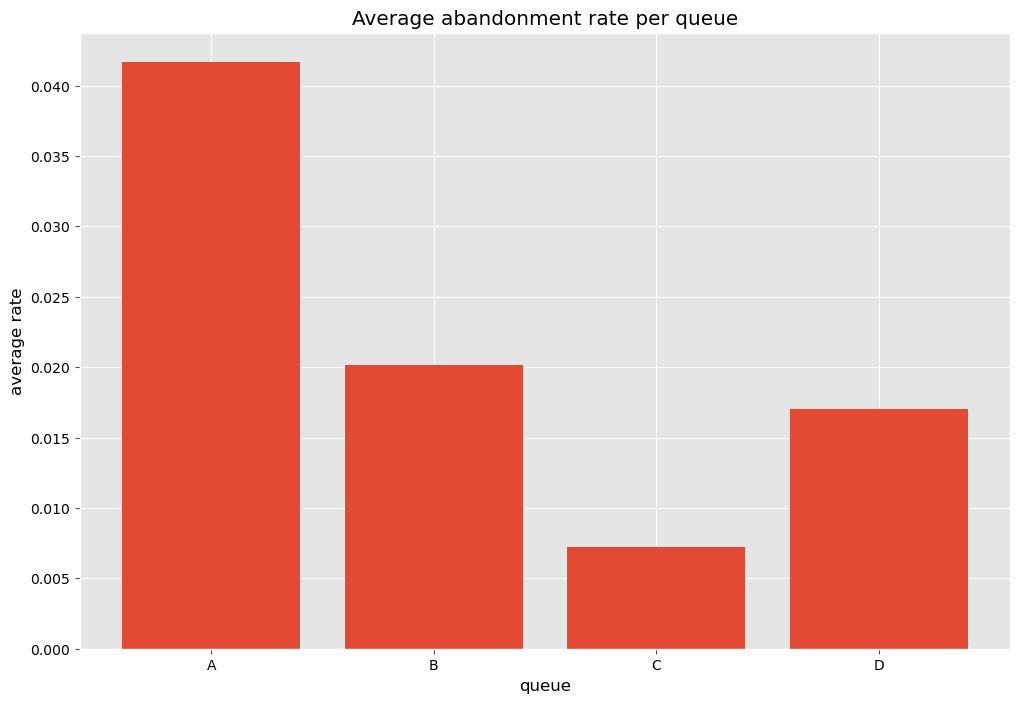

In [22]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style




# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    print(abandonment_rates)
#Your Code Here:

xaxis = list(abandonment_rates.keys())
yaxis = list(abandonment_rates.values())

plt.bar(xaxis, yaxis)

plt.title('Average abandonment rate per queue',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('queue',color = 'black')
plt.ylabel('average rate',color = 'black')
plt.show()



#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [25]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:


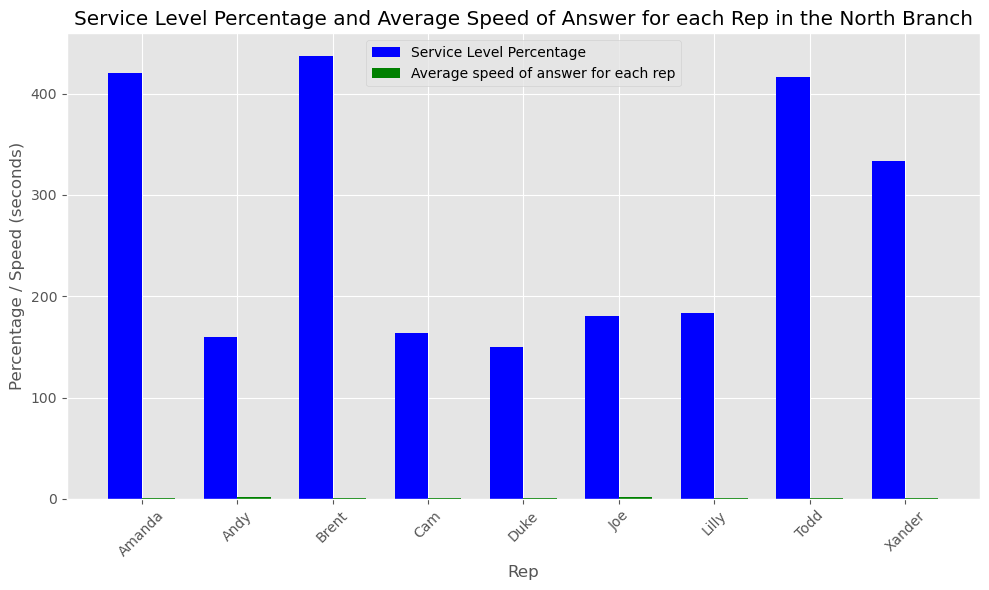

In [26]:
grouped_data=pd.merge(north_plt,service_level,on='Rep ID')

grouped_data['Rep ID']



bar_positions = list(range(len(grouped_data)))

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# Plotting Service Level Percentage
ax.bar(
    bar_positions,
    grouped_data['Service Level %'],
    bar_width,
    label='Service Level Percentage',
    color='b'
)

# Plotting Average Speed Of Answer
ax.bar(
    [pos + bar_width for pos in bar_positions],
    grouped_data['Incoming Wait Time'],
    bar_width,
    label='Average speed of answer for each rep',
    color='g'
)

ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(grouped_data['Rep ID'])
ax.set_xlabel('Rep')
ax.set_ylabel('Percentage / Speed (seconds)')
ax.set_title('Service Level Percentage and Average Speed of Answer for each Rep in the North Branch')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [27]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:


Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


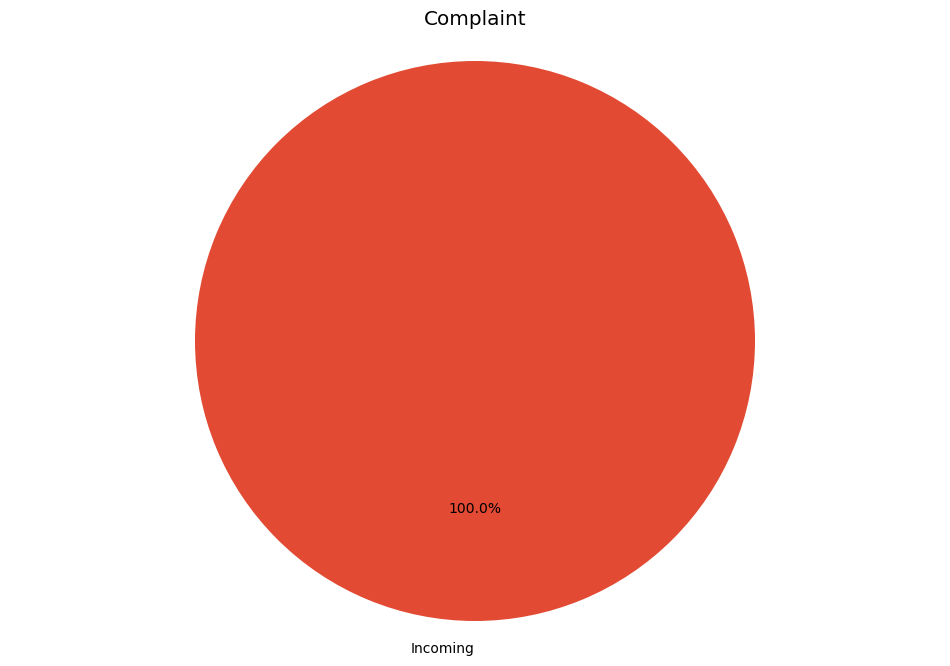

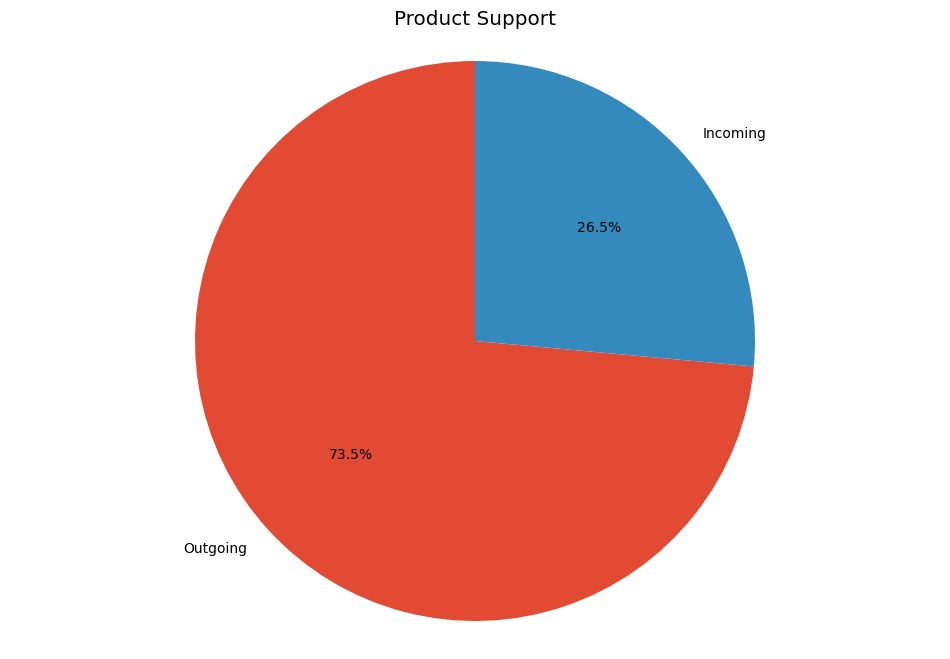

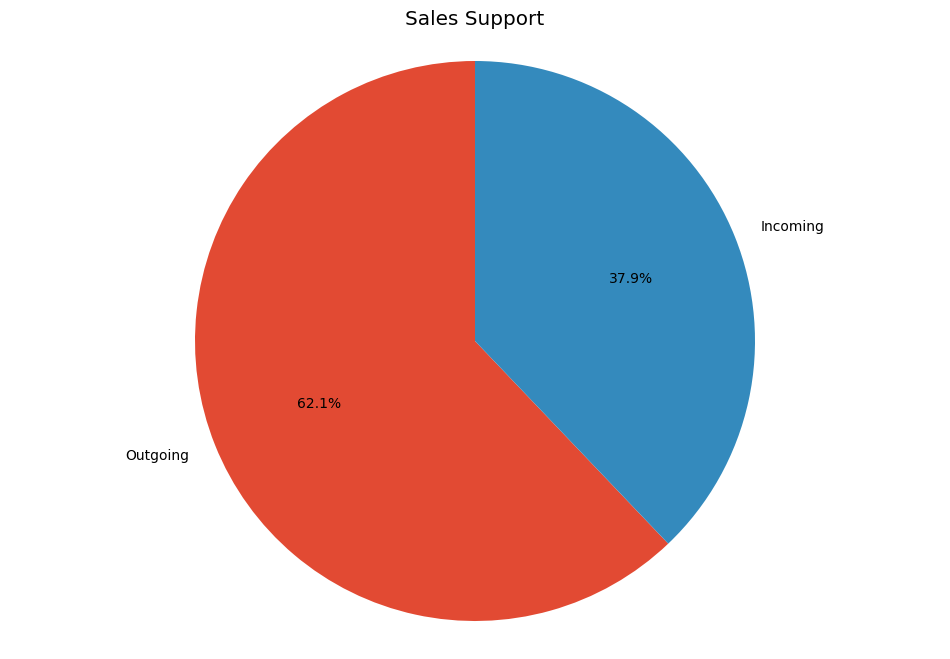

In [28]:
# Function to plot a pie chart for a single call purpose
def plot_pie_chart(di,call_purpose):
    # Get the data for the specific call purpose
    title=call_purpose
    
    # Create the pie chart
    plt.figure()
    plt.pie(di.values(), labels=di.keys(), autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')

# Loop through each call purpose dictionary and plot a pie chart for each
call_purposes = ["Complaint", "Product Support", "Sales Support"]
for call_purpose in call_purposes:
    if call_purpose == 'Product Support':
        plot_pie_chart(product_support,call_purpose)
    elif call_purpose == 'Sales Support':
        plot_pie_chart(sales_support,call_purpose)
    elif call_purpose == 'Complaint':
        plot_pie_chart(complaints,call_purpose)

plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
Average abandonment rate - north -2.86 ,south -1.27
speed Answer -north -3.05 , south -3.0
service level - north -40.24% ,south -38.1%




#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: Number of reps in North-9 and South - 11
Base on the number reps
South have more reos


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: We need more information to understanding the columns in the datasets.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: